# making an improvement
in this project we try to  improve previous project by using multiple regression

# importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression

In [2]:
data_set=pd.read_csv("FuelConsumption.csv")
data_set.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [4]:
data_set.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


# finding correlation between features

<AxesSubplot:>

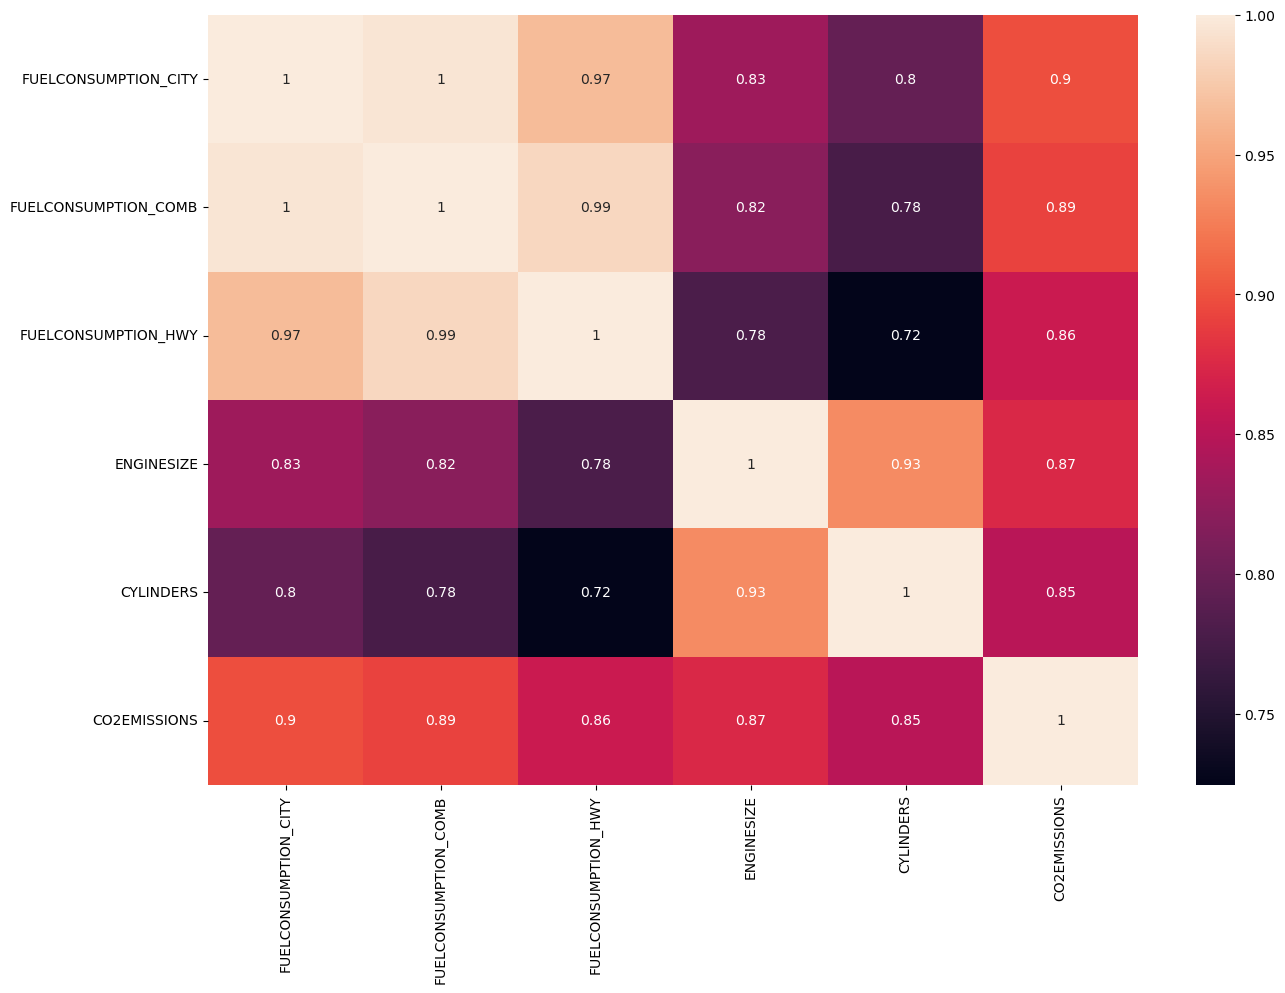

In [5]:
mycopy=data_set[["FUELCONSUMPTION_CITY","FUELCONSUMPTION_COMB","FUELCONSUMPTION_HWY","ENGINESIZE","CYLINDERS","CO2EMISSIONS"]].copy()
corr=mycopy.corr()
plt.subplots(figsize=(15,10))
sb.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True)

as we see this variables[FUELCONSUMPTION_CITY,FUELCONSUMPTION_COMB,ENGINESIZE,FUELCONSUMPTION_HWY] have positive correlation with our target CO2EMISSIONS

# train-test asplit

In [6]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(mycopy,test_size=0.2,random_state=5)

# modeling

In [7]:
reg=LinearRegression()
x_train=np.asanyarray(train_set[["FUELCONSUMPTION_CITY","FUELCONSUMPTION_COMB","ENGINESIZE","CYLINDERS"]])
y_train=np.asanyarray(train_set["CO2EMISSIONS"])
reg.fit(x_train,y_train)

LinearRegression()

In [8]:
from sklearn.metrics import r2_score
x_test=np.asanyarray(train_set[["FUELCONSUMPTION_CITY","FUELCONSUMPTION_COMB","ENGINESIZE","CYLINDERS"]])
y_test=np.asanyarray(train_set["CO2EMISSIONS"])
pred=reg.predict(x_test)
print(f"R2-score :  {round(r2_score(y_test,pred),2)}")

R2-score :  0.86


as we see we have better prediction by using multiple independent variables instead of using just one  independent variable